In [1]:
# Connected libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Loading and researching dataset
df_parkinson = pd.read_csv('parkinsons.csv')
print(df_parkinson.head(5))
print(df_parkinson.tail(5))

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [3]:
# Preparing data for ML
data = df_parkinson
labels = df_parkinson['status']

data = data.drop(['name', 'status'], axis=1)

In [10]:
# Preparing training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=10)

In [11]:
# Training a model
bst = XGBClassifier(n_estimators=20, max_depth=3, learning_rate=1, objective='binary:logistic')
bst.fit(X_train._get_numeric_data(), y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test Set Accuracy : 100.0 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        28

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



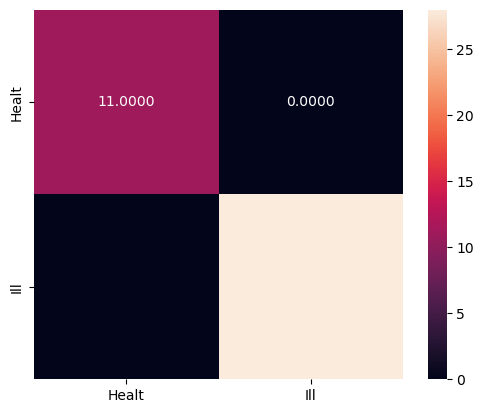

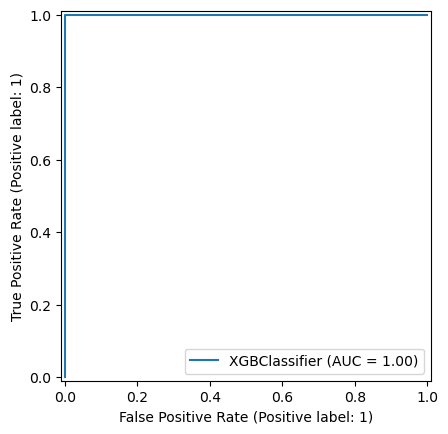

In [12]:
# Predicting values
preds = bst.predict(X_test._get_numeric_data())

print(f"Test Set Accuracy : {accuracy_score(y_test, preds) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, preds)}")

sns.heatmap(confusion_matrix(y_test, preds), xticklabels=['Healt', 'Ill'], yticklabels=['Healt', 'Ill'],
      annot=True, fmt='.4f', square=True)

svc_disp = RocCurveDisplay.from_estimator(bst, X_test._get_numeric_data(), y_test)